# Analisis de Regresión II

El análisis de regresión permite establecer relaciones entre una o mas variables (continuas) de estudio.

Para abrirlo con Google Colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase12_AnalisisDeRegresionII.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [1]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q

Text(0.5, 0, 'Nivel de Hidrocarburo (%)')

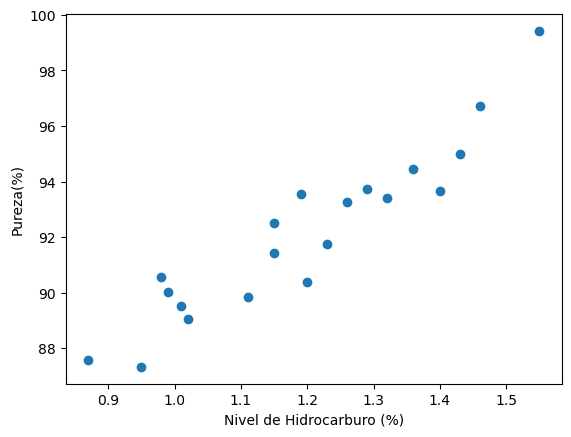

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "hc": [0.99, 1.02, 1.15, 1.29, 1.46, 1.36, 0.87, 1.23, 1.55, 1.40,
           1.19, 1.15, 0.98, 1.01, 1.11, 1.20, 1.26, 1.32, 1.43, 0.95],
    "pureza": [90.01, 89.05, 91.43, 93.74, 96.73, 94.45, 87.59, 91.77,
               99.42, 93.65, 93.54, 92.52, 90.56, 89.54, 89.85, 90.39,
               93.25, 93.41, 94.98, 87.33]
}

df = pd.DataFrame(data)

### Análisis exploratorio

fig, ax = plt.subplots()
ax.scatter(data['hc'], data['pureza'])
ax.set_ylabel('Pureza(%)')
ax.set_xlabel('Nivel de Hidrocarburo (%)')

## Modelo de Regresión Lineal

A partir del caso de estudio de pureza de oxígeno, podemos calcular los parámetros de la regresión.

$$ y = \beta_0 + \beta_1x + \epsilon$$

Donde $\beta_0$ y $\beta_1$ son coeficientes de la regresión y $\epsilon$ captura el error aleatorio.

Los coeficientes que se tienen siguen la siguiente formula:
$$
\beta_1 = \frac{\sigma_y}{\sigma_x}R
$$
Donde $\sigma_i$ es la desviación estándar de $i$, y R es la correlación entre x e y.
$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$
Donde $\bar{x}$ y $\bar{y}$ representan la media de las variables.

Beta0: 74.2833
Beta1: 14.9475


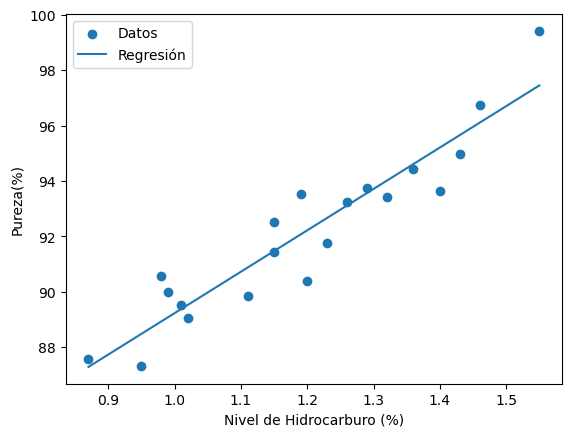

In [3]:
import scipy.stats as st
import numpy as np
x = df['hc']
y = df['pureza']
correlacion = st.pearsonr(x, y)[0]
x_mean = x.mean()
y_mean = y.mean()
beta1 = (y.std() / x.std()) * correlacion
beta0 = y_mean - (beta1 * x_mean)
print(f'Beta0: {beta0:.4f}')
print(f'Beta1: {beta1:.4f}')

nums = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots()
ax.scatter(x, y, label = 'Datos')
ax.set_ylabel('Pureza(%)')
ax.set_xlabel('Nivel de Hidrocarburo (%)')
ax.plot(nums, beta0 + beta1 * nums, label = 'Regresión')
ax.legend()

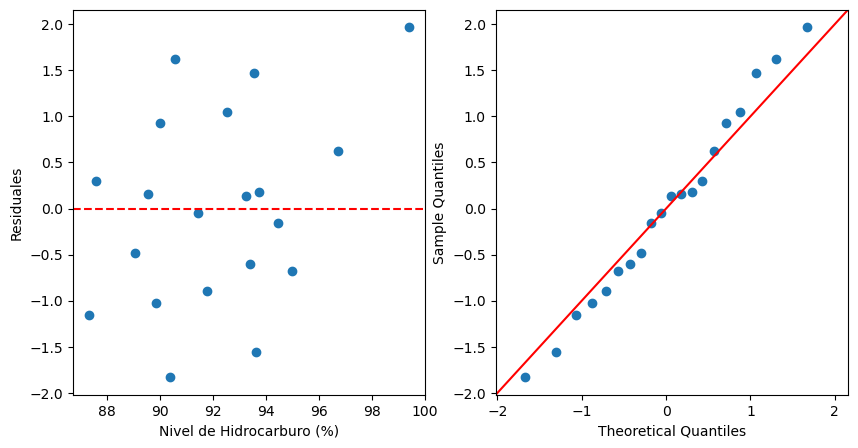

Shapiro Test: 0.9293428472932718


In [4]:
# Calculo de los residuales
import statsmodels.api as sm

fig, ax = plt.subplots(1,2, figsize = (10,5))
residuals = y - (beta0 + beta1 * x)
ax[0].scatter(y, residuals)
ax[0].set_ylabel('Residuales')
ax[0].set_xlabel('Nivel de Hidrocarburo (%)')
ax[0].axhline(y=0, color='r', linestyle='--')
# Normalidad de residuales
sm.qqplot(residuals, ax = ax[1], line = '45')
plt.show()
print(f'Shapiro Test: {st.shapiro(residuals).pvalue}')

Podemos ver que los residuales siguen una distribución normal dado por el qqplot y el test de Shapiro.

## Análisis de Regresión

Para poder analizar la regresión, es posible utilizar el $R^2$, o coeficiente de determinación.

In [5]:

R2 = correlacion ** 2

print(f'R2: {R2:.4f}')

R2: 0.8774


De esta forma, existe un 87% de variabilidad de la pureza que es explicada por el modelo.

Otra forma de analizar el modelo de regresión, es mediante la distancia de Cook.

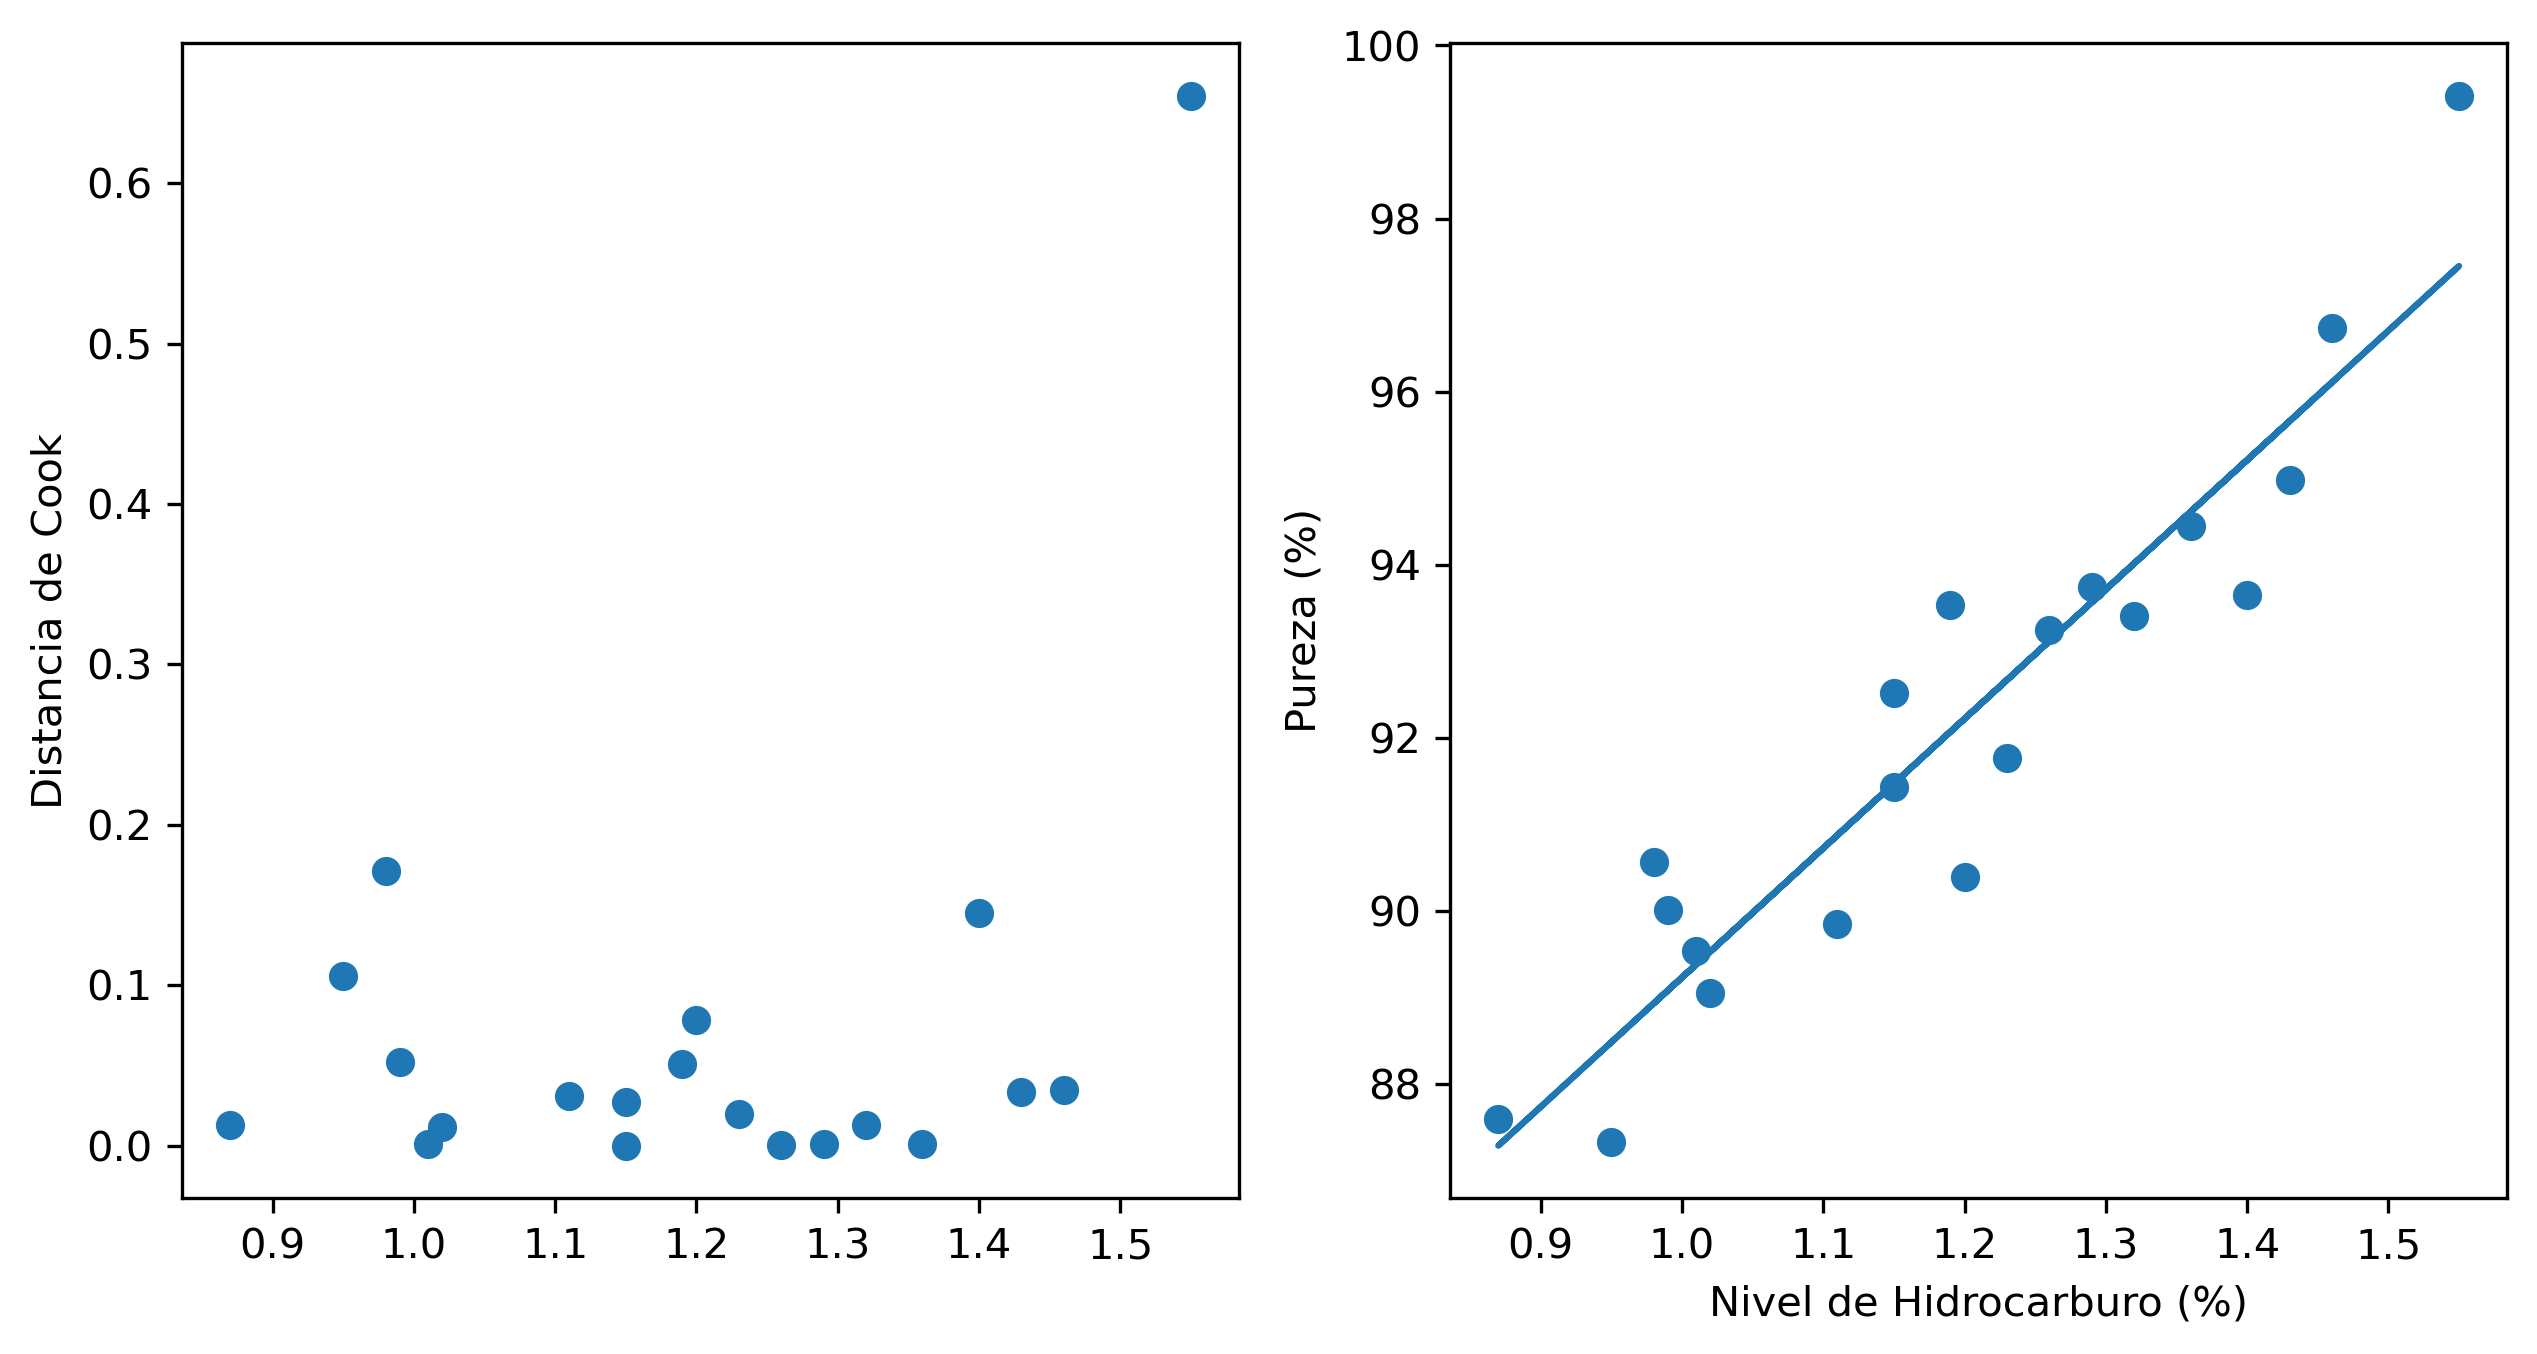

In [6]:
modelo_regresion = sm.OLS(y, sm.add_constant(x)).fit()
influence = modelo_regresion.get_influence()
cooks_distance = influence.cooks_distance[0]


fig, ax = plt.subplots(1,2, figsize = (10, 5), sharex = True,
                       dpi = 300)
ax[0].scatter(x, cooks_distance)
ax[0].set_ylabel('Distancia de Cook')
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
ax[1].set_xlabel('Nivel de Hidrocarburo (%)')
ax[1].plot(x, slope * x + intercept)
ax[1].set_ylabel('Pureza (%)')
ax[1].scatter(x,y)

De esta forma, podemos identificar aquel outlier que más influye en el modelo generado.

Y para la sección anterior, el outliers de los datos sin asociación, posee la siguiente característica.

In [7]:
import numpy as np
import pandas as pd
from io import StringIO

data_str = """x,y
5.632953933071785,10.26652558473546
14.292682432860898,-5.736260651285763
13.356985188949468,12.696818760248988
5.330982406317768,22.70905375139738
16.77968013849555,3.0381781073361234
12.128175834919137,7.047497350140256
13.55668216288333,-0.9659806893021727
6.268039011473929,16.782477489051686
3.2130396484088157,15.494212215423078
10.018495539326135,10.609811661384098
-0.5352649943969645,19.52075182520905
14.786152901557479,9.08201531808917
3.9022850372328017,0.5966595900740392
-1.4327224259260642,18.1856619740959
12.657955592107378,10.713866111408612
6.247514499132093,-7.799871791336132
7.320105651327481,-7.388795886681166
22.290017244046716,-4.225911235513507
14.879956266029538,18.49612062115048
14.130685587485363,-10.676165869471603
9.4055315094151,6.437999250599389
5.158744428990462,-3.861099941217587
-3.677161479191332,4.744258096378043
7.850455156950677,1.7226460712222904
4.8112679459574785,4.240389843631043
9.247118985641738,-8.546636300835168
9.315672391398023,-4.608088185597406
10.956248567146318,7.249543392685798
9.069628858650546,3.768395368736006
2.449382110467531,5.0104102001239985
9.730096608705459,-0.712432479238883
5.316579543842664,9.226217750232308
14.902810904294896,-11.733858102258935
22.13697995698655,-6.360259305718504
15.259043494008344,8.612124894239937
1.4065493071060562,15.568642128201585
-25.75651527544006,-14.929204528045041
12.952360165815206,12.64385053589725
11.353813530247514,5.071653485388705
-4.5775225469821095,6.0197433586368785
10.538861597599919,2.6723284443726283
10.136847693850775,-9.203631279439042
7.250725057729307,-3.133227305700867
4.6568624264675575,9.610693038179434
7.954043450140906,2.8510639042814496
6.310336331571889,6.389452481135367
21.773132659408304,13.442303618887726
9.264317466103956,-8.084503332116125
12.681554384759938,15.451686581364205
8.145083254427185,17.101739229185007"""

no_asociacion = pd.read_csv(StringIO(data_str))


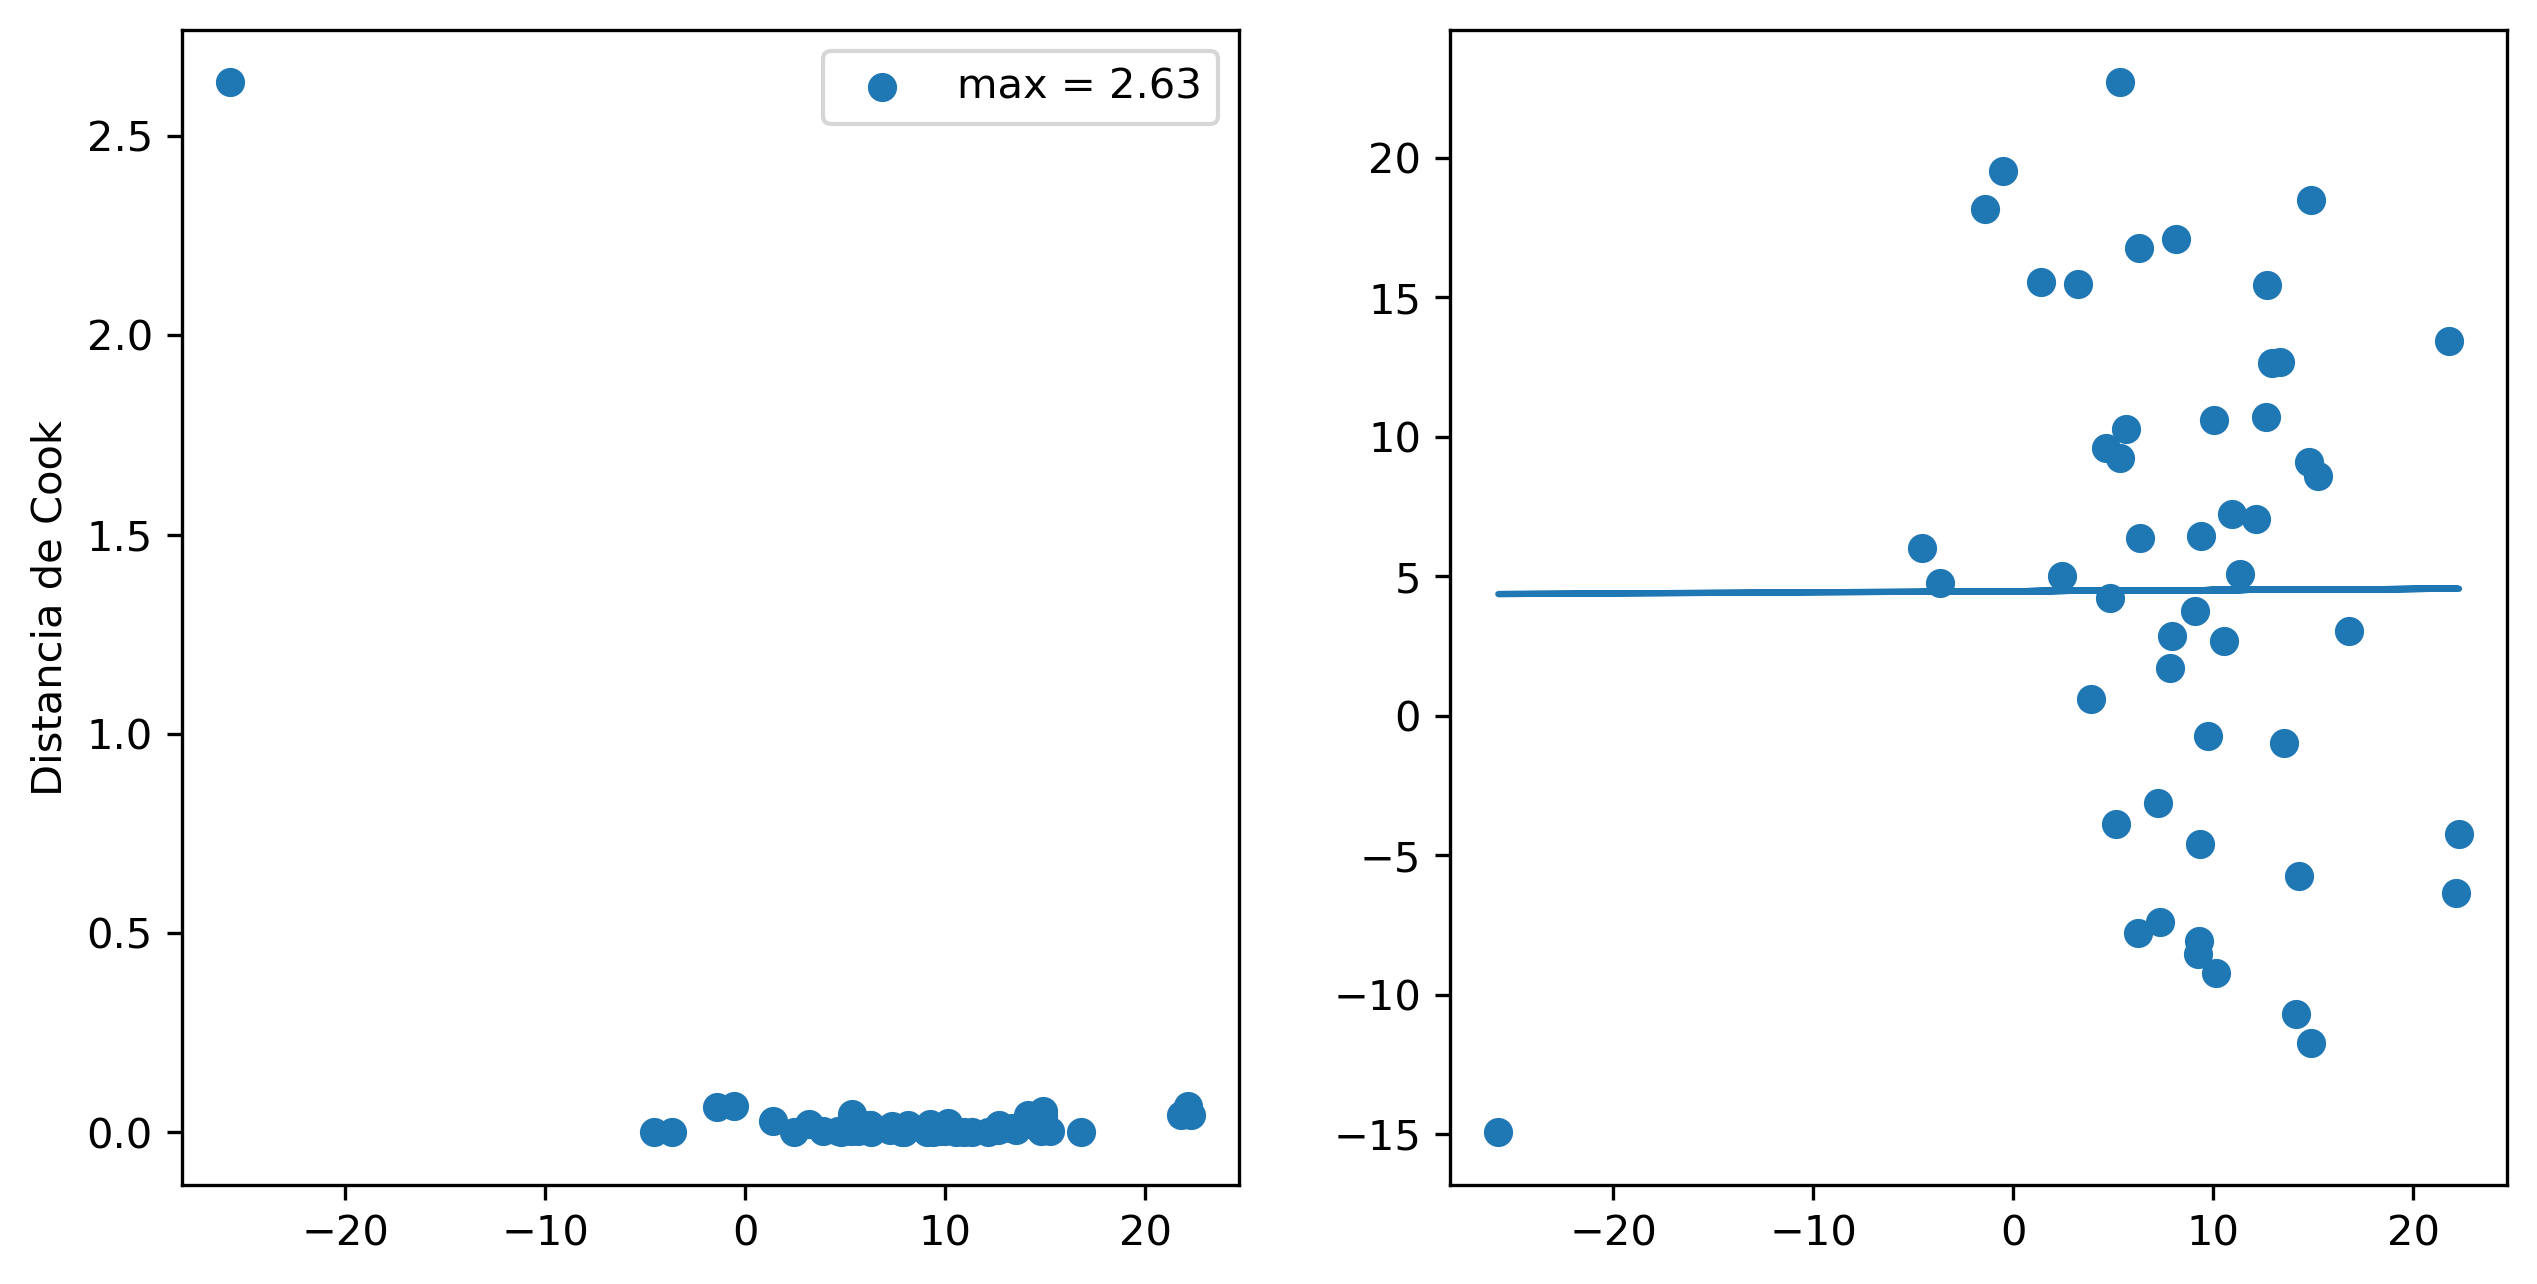

In [8]:
x = no_asociacion['x']
y = no_asociacion['y']
modelo_regresion = sm.OLS(y, sm.add_constant(x)).fit()
influence = modelo_regresion.get_influence()
cooks_distance = influence.cooks_distance[0]



fig, ax = plt.subplots(1,2, figsize = (10, 5), sharex = True,
                       dpi = 300)
ax[0].scatter(x, cooks_distance, label = f'max = {np.max(cooks_distance):.2f}')
ax[0].legend()
ax[0].set_ylabel('Distancia de Cook')
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
# ax[1].set_xlabel('Nivel de Hidrocarburo (%)')
ax[1].plot(x, slope * x + intercept)
# ax[1].set_ylabel('Pureza (%)')
ax[1].scatter(x,y)